In [1]:
import torch 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

# https://jovian.ai/aakashns/02-linear-regression

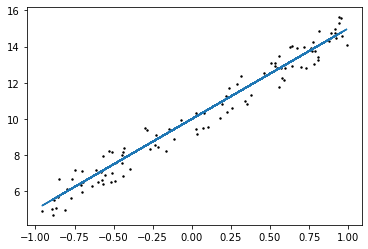

In [2]:
n, d = 100, 1 # 1 dimension array
#                         |
X = np.random.uniform(-1, 1, (n, d))
w_true, b_true = np.array([5]).reshape(-1, 1), np.array([10])

# noise is 1 dim array as well
noise = np.random.uniform(-1, 1, (n, 1))

# y = X @ W + b
y_true = X @ w_true + b_true + noise
y_true_graph = X @ w_true + b_true

plt.scatter(X, y_true, s = 2, color = "black")
plt.plot(X, y_true_graph)
plt.plot()


plt.show()

# Linear Regression from Scratch (mimic pytorch)


## Initialize random weights

In [3]:
# intiliaze random weights
class LinearModel:
    def __init__(self, input_dim, output_dim = 1):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(output_dim)
    
    def __call__(self, x):
        # same thing in nn.Module forward function
        self.x = x
        return x @ self.weights + self.bias
    
    def __str__(self):
        return self.weights, self.bias

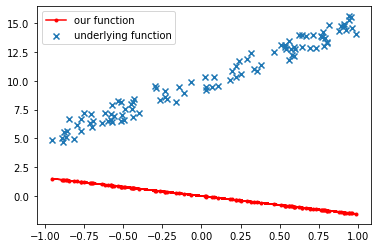

In [4]:
myLinear = LinearModel(input_dim=1)
y_pred = myLinear(X)

plt.scatter(X, y_true, marker='x', label='underlying function')
plt.plot(X, y_pred, color='r', marker='.', label='our function')
plt.legend()

## Loss Function Implementation

In [5]:
class MSE:

    def __call__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean((self.y_true - self.y_pred)**2)

In [6]:
loss = MSE()
loss(y_true, y_pred)

121.85502152909737

## Add gradient component and backprobgation(mimic pytorch)


- loss = MSE()
- linear = Linear(d)
- y_pred = linear(x)
- print(loss(y_pred, y_true))
- loss_gradient = loss.backward()
- linear.backward(loss_gradient)
- linear.update(0.1)
- y_pred = linear(x)
- print(loss(y_pred, y_true))

![img](./img/gradient_mse_matrix1.png)

We can use numpy to compute the gradient in matrix form --> [beta0, beta1]. For the code down below, we compute `w1` and `bias` parameters seperately

In [51]:
class MSE:
    
    def __call__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean((y_true - y_pred)**2)
    
    def backward(self):
        # stochastic gradient descent
        n = self.y_true.shape[0]
        return 2/n * (self.y_pred - self.y_true) # dloss/dyhat (grey part)

![img](./img/partial_deriv6.png)

In [45]:
# intiliaze random weights
class LinearModel:
    def __init__(self, input_dim, output_dim = 1):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(output_dim)
    
    def __call__(self, x):
        self.x = x
        return x @ self.weights + self.bias
    
    def __str__(self):
        return self.weights, self.bias
    
    def backward(self, loss_gradient):                    #                        (blue part)
        self.weights_gradient = self.x.T @ loss_gradient # dloss/dw = dloss/dy_hat * dyhat/dw
        self.bias_gradient = loss_gradient.sum(axis=0) # dloss/dbias = dloss/dyheat * dyhat/dbias
#         print(self.x.shape, loss_gradient.shape) => (100, 1) (100, 1)
    
    def step(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

![img](./img/gradient_mse_matrix2.png)

In [46]:
def one_epoch_test(X, lr, myLinearModel, loss):
    
    y_pred = myLinearModel(X)
    loss_value = loss(y_true, y_pred)
    print("loss: ", loss_value)

    gradient_from_loss = loss.backward()
    myLinearModel.backward(gradient_from_loss)
    myLinearModel.step(lr)

In [47]:

d, loss = 1, MSE()
myLinearModel = LinearModel(d)
lr, num_epochs = 0.01, 100

one_epoch_test(X, lr, myLinearModel, loss)

loss:  120.04222953391181


In [48]:
def one_epoch_train(X, lr, myLinearModel, loss):
    
    y_pred = myLinearModel(X)
    loss_value = loss(y_true, y_pred)
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(X, y_pred.squeeze(), label=f'Epoch {epoch}')
    gradient_from_loss = loss.backward()
    myLinearModel.backward(gradient_from_loss)
    myLinearModel.step(lr)
    return X, y_pred

Epoch 0, loss 110.52985479046507
Epoch 1, loss 71.81750667289019
Epoch 2, loss 46.93321376408037
Epoch 3, loss 30.903947231544745
Epoch 4, loss 20.5500512945234
Epoch 5, loss 13.837806623328198
Epoch 6, loss 9.465831439564614
Epoch 7, loss 6.600849252888719
Epoch 8, loss 4.708868464500528
Epoch 9, loss 3.4473106372009976
Epoch 10, loss 2.5960740606036143
Epoch 11, loss 2.0134713434849023
Epoch 12, loss 1.6080590602825857
Epoch 13, loss 1.32062183536913
Epoch 14, loss 1.1126455778233106
Epoch 15, loss 0.9589382976564151
Epoch 16, loss 0.8429024884301455
Epoch 17, loss 0.7535031922353589
Epoch 18, loss 0.6833209058259229
Epoch 19, loss 0.62729891554069
Epoch 20, loss 0.581935477834296
Epoch 21, loss 0.5447612442228564
Epoch 22, loss 0.5139998297622893
Epoch 23, loss 0.4883461739003462
Epoch 24, loss 0.4668208351179948
Epoch 25, loss 0.4486733828915742
Epoch 26, loss 0.4333176599296919
Epoch 27, loss 0.4202878377761939
Epoch 28, loss 0.40920812770458526
Epoch 29, loss 0.3997715337288787
E

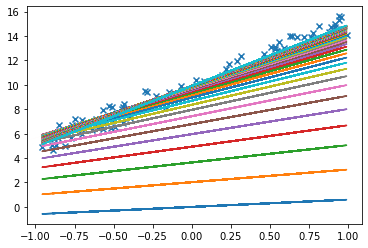

In [50]:
d, loss = 1, MSE()
myLinearModel = LinearModel(d)
lr, num_epochs = .1, 50

plt.scatter(X, y_true, marker='x', label='underlying function')
for epoch in range(num_epochs):
    X, y_pred = one_epoch_train(X, lr, myLinearModel, loss)

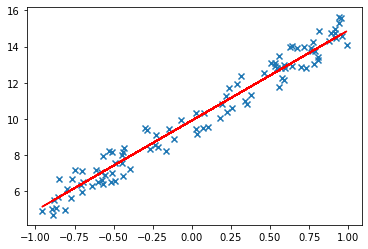

In [35]:
# get the final fitted line
plt.scatter(X, y_true, marker='x', label='underlying function')
plt.plot(X, y_pred.squeeze(), c = "r")

# Linear Regression from Scratch (Mimic sklearn)

In [36]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype


def normalize(X): # creating standard variables here (u-x)/sigma
    if isinstance(X, pd.DataFrame):
        for c in X.columns:
            if is_numeric_dtype(X[c]):
                u = np.mean(X[c])
                s = np.std(X[c])
                X[c] = (X[c] - u) / s
        return
    for j in range(X.shape[1]):
        u = np.mean(X[:,j])
        s = np.std(X[:,j])
        X[:, j] = (X[:, j] - u) / s

def MSE(X, y, B, lmbda):
    """
    X, y, beta: B are all numpy array
    X: (n, p) Matrix
    Y: (n, 1) vector
    B: (p, 1) vector
    """
    error = y - np.dot(X, B)
    # eTe => error vector dot itsef = square of norm
    # notice that mse is a quadratic equation -> convex guarenteed
    sse = np.linalg.norm(error) ** 2  # sum of squared errors
    num_observations = X.shape[0]  # num_observations = n

    # return mean square of error
    return sse / num_observations
    # For optimization, we don’t care about scaling MSE by 1/n
    # (though we have to be careful to adjust
    # the learning rate), giving our “loss” function:


def loss_gradient(X, y, B, lmbda):
    """
    This function implement the gradient of loss function: MSE
    By using caculas method. You can also use numerical way
    to approach the gradient of loss function
    https://cs231n.github.io/optimization-1/

    X, y, beta: B are all numpy array
    X: (n, p) Matrix
    Y: (p, 1) vector
    B: (p, 1) vector
    """
    error = y - X.dot(B)  # (n, 1)
    gradientOfLossFucntion = -np.dot(X.T, error)  # (p, n) @ (n,1)
    return gradientOfLossFucntion  # (p, 1)

In [38]:
def minimize(X, y, loss_gradient, eta=0.00001,
            lmbda=0.0, max_iter=1000, addB0=True, precision=1e-9):

    """Performing AdaGradient Descent to minimize

    Args:
        X ([type]): [description]
        y ([type]): [description]
        loss_gradient ([type]): [description]
        eta (float, optional): [description]. Defaults to 0.00001.
            eta will set learing rate (Step Size)
        lmbda (float, optional): [description]. Defaults to 0.0.
        max_iter (int, optional): [description]. Defaults to 1000.
        addB0 (bool, optional): [description]. Defaults to True.

        precision (float, optional): [description]. Defaults to 0.00000001.
    """
    if X.ndim != 2:
        raise ValueError("X must be n x p for p features")

    n, p = X.shape
    if y.shape != (n, 1):
        raise ValueError(f"y must be n={n} x 1 not {y.shape}")

    # add column of 1s to X
    # https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array
    if addB0:
        # .c_ goes for add columns, .r_: add row
        X = np.c_[np.ones(n), X]
        p += 1  # add extra dim for beta_0

    # initialize beta vector as ranndom vector, make between [-1,1)
    B = np.random.random_sample(size=(p, 1)) * 2 - 1

    # store history of beta vector: useful for adagradient
    # eps -> prevent division by 0
    prev_B, eps = B, 1e-5
    history = np.zeros((p, 1))

    index = 0
    while index < max_iter:
        # gradientOFLoss: numpy array contain gradient at x point (p, 1)
        grad_loss = loss_gradient(X, y, B, lmbda)
        history += grad_loss ** 2
        # Important: do not assign it like below otherwise the scale vector
        # will be really small and later on gradient will explode and never
        # converge scale_vector = 1 / np.sqrt(history + eps)

        if np.linalg.norm(grad_loss) < precision:
            print("gradient decent finished, solution gets converged")
            return B
        # elementwise muplication
        B = B - eta / np.sqrt(history + eps) * grad_loss
        index += 1

    # if number of iteration get access predefined level
    print("iteration over max level, not converged stop iterating")
    return B

In [39]:
class LinearRegression621:  # REQUIRED
    """
    usage:
        regr = LinearRegression621()
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
    """
    def __init__(self, eta=0.00001, lmbda=0.0, max_iter=1000):
        self.eta = eta
        self.lmbda = lmbda
        self.max_iter = max_iter

    def predict(self, X):
        n = X.shape[0]
        B0 = np.ones(shape=(n, 1))
        X = np.hstack([B0, X])
        return np.dot(X, self.B)

    def fit(self, X, y):
        self.B = minimize(
            X, y, loss_gradient, self.eta,
            self.lmbda, self.max_iter)